In [1]:
import shap
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm  
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc,roc_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.metrics import roc_curve, auc,mean_squared_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay  
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.calibration import calibration_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix


import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from utils1 import calculate_confidence_interval,train_model,AUC_plot,shap_value,boxplot_and_savefig,bootstrap_ci

In [ ]:
def model_test(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
# 预测测试集
    y_pred = model.predict(X_test)

# 计算AUC
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)

# 创建一个DataFrame来存储结果
    metrics_df = pd.DataFrame({
    'Metric': ['AUC', 'ACC', 'recall', 'spe', 'sen', 'F1'],
    'Value': [roc_auc, acc, recall, specificity, sensitivity, f1]
})
    print(metrics_df)
    return metrics_df

In [2]:
os.getcwd()

'/home/xyy/jupyter/code'

In [4]:
dir='/home/xyy/jupyter/train_data_new'

exp_train=pd.read_excel(os.path.join(dir,"exp_train.xlsx"))
exp_test=pd.read_excel(os.path.join(dir,"exp_test.xlsx"))
Intergrate_train=pd.read_excel(os.path.join(dir,"Intergrate_train.xlsx"))
Intergrate_test=pd.read_excel(os.path.join(dir,"Intergrate_test.xlsx"))
meta_train=pd.read_excel(os.path.join(dir,"meta_train.xlsx"))
meta_test=pd.read_excel(os.path.join(dir,"meta_test.xlsx"))
MRI_train=pd.read_excel(os.path.join(dir,"MRI_train.xlsx"))
MRI_test=pd.read_excel(os.path.join(dir,"MRI_test.xlsx"))
y_train=pd.read_excel(os.path.join(dir,"y_train.xlsx"))
y_test=pd.read_excel(os.path.join(dir,"y_test.xlsx"))


exp_train=exp_train.iloc[:,1:]
exp_test=exp_test.iloc[:,1:]
Intergrate_train=Intergrate_train.iloc[:,1:]
Intergrate_test=Intergrate_test.iloc[:,1:]
meta_train=meta_train.iloc[:,1:]
meta_test=meta_test.iloc[:,1:]
MRI_train=MRI_train.iloc[:,1:]
MRI_test=MRI_test.iloc[:,1:]
y_train=y_train.iloc[:,1:]
y_test=y_test.iloc[:,1:]

In [157]:
MRI_exp_train=pd.concat([MRI_train,exp_train],axis=1)
MRI_exp_test=pd.concat([MRI_test,exp_test],axis=1)

meta_exp_train=pd.concat([meta_train,exp_train],axis=1)
meta_exp_test=pd.concat([meta_test,exp_test],axis=1)

MRI_meta_train=pd.concat([MRI_train,meta_train],axis=1)
MRI_meta_test=pd.concat([MRI_test,meta_test],axis=1)


In [180]:
model1=LogisticRegression(tol=0.0001, solver= 'saga', random_state=8, penalty='l1', n_jobs= -1, multi_class='multinomial', max_iter= 600, intercept_scaling=0.001, fit_intercept=True, dual=False, class_weight='balanced', C=1)

In [181]:
model2=LogisticRegression()

In [245]:
model3=LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [183]:
result0=model_test(model1,X_train,X_test,y_train,y_test)

   Metric     Value
0     AUC  0.958333
1     ACC  0.926829
2  recall  0.916667
3     spe  0.941176
4     sen  0.916667
5      F1  0.936170


/home/xyy/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [185]:
result1=model_test(model2,MRI_exp_train,MRI_exp_test,y_train,y_test)

   Metric     Value
0     AUC  0.953431
1     ACC  0.902439
2  recall  0.916667
3     spe  0.882353
4     sen  0.916667
5      F1  0.916667


/home/xyy/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [235]:
result1=model_test(model3,MRI_exp_train,MRI_exp_test,y_train,y_test)

   Metric     Value
0     AUC  0.870098
1     ACC  0.780488
2  recall  0.833333
3     spe  0.705882
4     sen  0.833333
5      F1  0.816327


/home/xyy/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [188]:
result2=model_test(model1,meta_exp_train,meta_exp_test,y_train,y_test)

   Metric     Value
0     AUC  0.786765
1     ACC  0.707317
2  recall  0.791667
3     spe  0.588235
4     sen  0.791667
5      F1  0.760000


/home/xyy/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [189]:
result3=model_test(model1,MRI_meta_train,MRI_meta_test,y_train,y_test)

   Metric     Value
0     AUC  0.953431
1     ACC  0.902439
2  recall  0.958333
3     spe  0.823529
4     sen  0.958333
5      F1  0.920000


/home/xyy/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [246]:
result4=model_test(model3,MRI_train,MRI_test,y_train,y_test)

   Metric     Value
0     AUC  0.872549
1     ACC  0.756098
2  recall  0.791667
3     spe  0.705882
4     sen  0.791667
5      F1  0.791667


/home/xyy/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [192]:
result5=model_test(model2,exp_train,exp_test,y_train,y_test)

   Metric     Value
0     AUC  0.718137
1     ACC  0.707317
2  recall  0.750000
3     spe  0.647059
4     sen  0.750000
5      F1  0.750000


/home/xyy/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [194]:
result6=model_test(model2,meta_train,meta_test,y_train,y_test)

   Metric     Value
0     AUC  0.694853
1     ACC  0.634146
2  recall  0.916667
3     spe  0.235294
4     sen  0.916667
5      F1  0.745763


/home/xyy/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [256]:
all={}
all["Intergrate"]=result0
all["MRI_exp"]=result1
all["meta_exp"]=result2
all["MRI_meta"]=result3
all["MRI"]=result4
all["exp"]=result5
all["meta"]=result6

with open('result.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['key', 'value'])  # 写入标题行
    for key, value in all.items():
        writer.writerow([key, str(value)])  # 写入键值对

In [196]:
def AUC_plot(model,X_train,X_test,y_train,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    return y_pred_proba,y_pred,np.array(y_test)

In [212]:
y_test1 = y_test.values

# 将数组转换为一维数组
y_test1= y_test1.flatten()

In [253]:
AUC0=AUC_plot(model1,X_train,X_test,y_train,y_test1)
# AUC1=AUC_plot(model2,MRI_exp_train,MRI_exp_test,y_train,y_test1)
# AUC2=AUC_plot(model1,meta_exp_train,meta_exp_test,y_train,y_test1)
# AUC3=AUC_plot(model1,MRI_meta_train,MRI_meta_test,y_train,y_test1)
AUC4=AUC_plot(model3,MRI_train,MRI_test,y_train,y_test1)
AUC5=AUC_plot(model2,exp_train,exp_test,y_train,y_test1)
AUC6=AUC_plot(model2,meta_train,meta_test,y_train,y_test1)


AUC=[]
AUC.append(AUC0)
# AUC.append(AUC1)
# AUC.append(AUC2)
# AUC.append(AUC3)
AUC.append(AUC4)
AUC.append(AUC5)
AUC.append(AUC6)

/home/xyy/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/xyy/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/xyy/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/xyy/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

In [260]:
AUC = np.array(AUC)
np.save('AUC.npy', AUC)

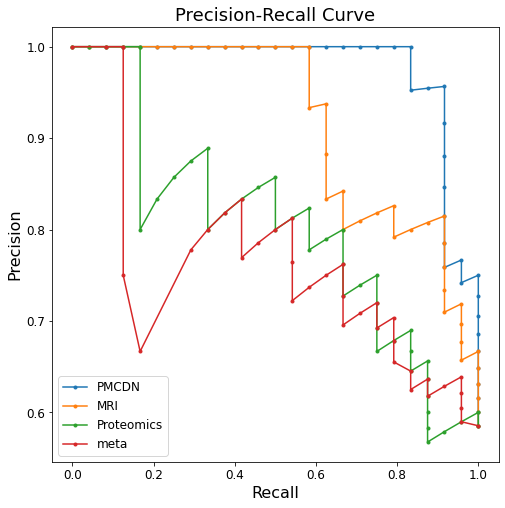

In [265]:
from sklearn.metrics import precision_recall_curve  
j=["PMCDN","MRI","Proteomics","meta"]
plt.figure(figsize=(8, 8))
for i in range(len(AUC)):
    precision, recall, _ = precision_recall_curve(AUC[i][2],AUC[i][0] )  
# 绘制PR图  
    plt.plot(recall, precision, marker='.', label="{}".format(j[i]))  
plt.legend(loc='lower left',fontsize=12) 
plt.yticks(fontsize=12)
plt.xticks(fontsize=12) 
plt.xlabel('Recall',fontsize=16) 
plt.ylabel('Precision',fontsize=16) 
plt.title('Precision-Recall Curve',fontsize=18)
plt.savefig('PR.pdf') 
plt.show()

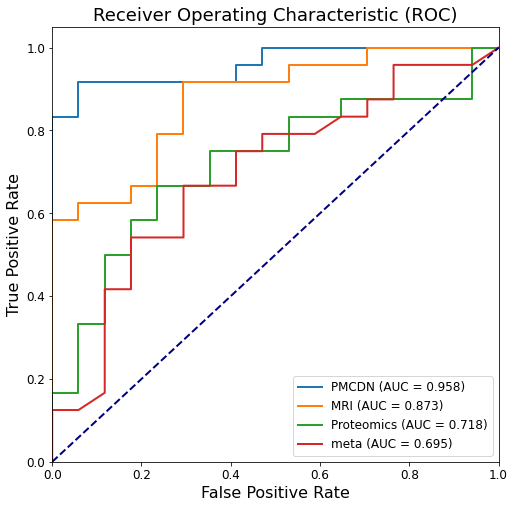

In [262]:

# 绘制AUC曲线
plt.figure(figsize=(8, 8))
for i in range(len(AUC)):   
    fpr, tpr, _ = roc_curve(AUC[i][2], AUC[i][0])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='{} (AUC = {:.3f})'.format(j[i], roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks(fontsize=12)
plt.xticks(fontsize=12) 
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.tick_params(axis='both', which='minor', labelsize=12)

plt.title('Receiver Operating Characteristic (ROC)',fontsize=18 )
plt.legend(loc='lower right', fontsize=12)

plt.savefig('ROC.pdf') 
plt.show()

In [261]:
shap_value(model1,X_train,y_train)

/home/xyy/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/xyy/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/xyy/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/xyy/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape